## Abstract

what makes the price of a car high or low? and what factors can influence the price of a car? How can I as a customer or seller of a car know the range of car in market? To help know the selling_price of the used cars in the market, this data set has been collected from different locations and for different brands of cars. There are many factors that can affect the price, but we want to know the most influential factors. I worked in this dataset, clean and make sure of data quality, find the relationship between factors, select target and drop factors that don't have influnce on target. Then, start with EDA and explore the data, answring important questions and use data visualization to show the results. After that,find the best machine learning models to predict the selling price.

## Overview and Motivation

Buying or selling used cars is one of the situations that you or a friend of yours have. And to protect yourself from manipulation, you need a reference that will help you find the right price for a used car in the market.
This project will help two sides. The first aspect is the seller, whether an individual or a company. This will help set a fair price and get the correct cars in their inventory depending on the most desirable ones. The second aspect is the buyer, as this project will show the price range of a particular car on the market.
Besides, this project will answer important questions related to used cars and show their results. For example, 
Which factors are more important in deciding selling price?
Which car brands are selling most?
Are there specific region selling more?
What is the relation between the selling price and factors as car brand, year, km_driven, region, fuel, seller_type, transmission, owner, mileage, max_power ,and seats

## Related Work

Not all people have the ability to determine the correct range for a vehicle. Not everyone knows what factors can affect the price of a car. I'm one of those clients who've experienced this, and I've been on both sides that I mention in the overview and motivation part. Side One As a buyer, I've bought a car that's actually worth less than what I paid. The second aspect As a seller, I decided to sell my car and the dealer who bought the car convinced me that this is the price of the car in the market, on the contrary, he convinced me that he paid me more. Besides, I know many such stories that happened to my relatives and one of these stories reached in court due to price gouging. So, Having such a project will help a lot in solving this problem.

## Initial Questions

Research Question: What is the expected price of the used car that has these features ( brand name: Ford, year: 2015, fuel: petrol, seat: 4.........)? The machine learning model will expect the price (target) depending on features ( year,km_driven,mileage,engine,max_power,seats, name,Region,seller_type,fuel,transmission,owner).
Other Questions:
Will increasing in number of seats, model, max power and mileage increase the selling price?
Does the decrease in number of km driven and number of owner increase the selling price?
Are km-driven and year the most effected variable?

## Data

The dataset to be used is the used cars dataset which contains 7906 instances and 18 columns. It contains numerical and categorical variables. The dataset is from Kaggle website: https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?resource=download
1. Finding Null values (There is no Null values)
2. Define the data types of variables
3. Define the unique values of each variables
4. Drop, transfer Change some variables to be useful in the analysis

####  1. Finding Null values

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table('UsedCarData.csv', sep=',', engine='python')
print("Shape of data=>",df.shape)
print(df.isnull().sum())
df.head(5)

Shape of data=> (7906, 18)
Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64


,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


####  2. Define the data types of variables

In [330]:
df.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

#### 3. Define the unique values of each variables

In [331]:
df.nunique()

Sales_ID             7906
name                   31
year                   27
selling_price         670
km_driven             898
Region                  4
State or Province      49
City                 1310
fuel                    4
seller_type             3
transmission            2
owner                   5
mileage               381
engine                121
max_power             318
torque                441
seats                   9
sold                    2
dtype: int64

#### 4. Drop, transfer Change some variables to be useful in the analysis

In [351]:
#Drop torque
df = df.drop(['torque'], axis = 1)
#Sold
df.loc[df['sold'] == 'Y', 'sold'] = 1
df.loc[df['sold'] == 'N', 'sold'] = 0
#Transfer to integer
df['mileage']=df['mileage'].astype(int)
df['max_power']=df['max_power'].astype(int)
df['sold']=df['sold'].astype(int)
df.dtypes

Sales_ID              int64
name                 object
year                  int64
selling_price         int64
km_driven             int64
Region               object
State or Province    object
City                 object
fuel                 object
seller_type          object
transmission         object
owner                object
mileage               int32
engine                int64
max_power             int32
seats                 int64
sold                  int32
dtype: object

## Exploratory Data Analysis

I used multiple graphs to explore and understand the data, there is a matrix, bar chart, pie chart, scatter plot, and tables. These graphs are suitable for describing and showing the result of the data. This section is divided into two parts. In the first part, I focus on data discovery. Each graph answers a titled question or explains a titled point. In the second part, there are the target and the impacte factors. Each graph in the second part shows the relationship between the target (price) and the impact factors.

### 1. Discover the dataset

#### Data Statistics

In [3]:
df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats,sold
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,18.981027,1458.708829,91.271060,5.416393,0.252972
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.064364,503.893057,35.732781,0.959208,0.434743
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.000000,2.000000,0.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.000000,1197.000000,68.000000,5.000000,0.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,5.000000,0.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.000000,1582.000000,102.000000,5.000000,1.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000


#### Relation Between Variables

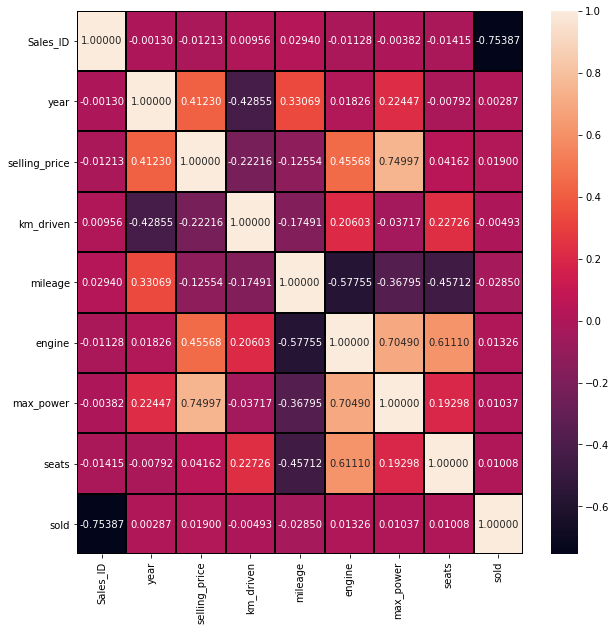

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="black",fmt=".5f",ax=ax)
plt.show()

#### What are the most brand in the dataset?

Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
BMW            118
Skoda          104
Nissan          81
Jaguar          71
Volvo           67
Datsun          65
Mercedes        54
Fiat            41
Audi            40
Lexus           34
Jeep            31
Mitsubishi      14
Force            6
Land             6
Isuzu            5
Ambassador       4
Kia              4
MG               3
Daewoo           3
Ashok            1
Opel             1
Name: name, dtype: int64


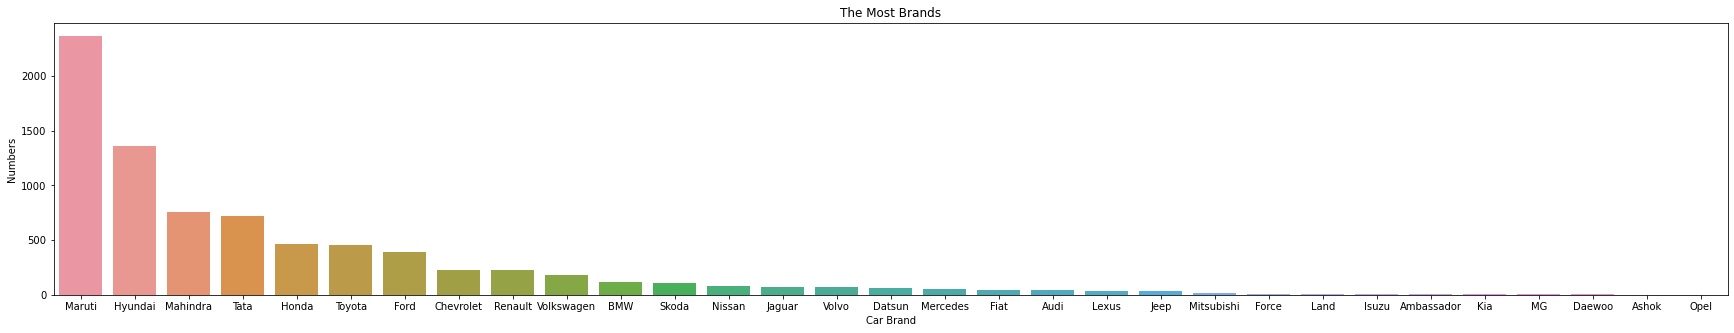

In [5]:
Brandcount=df["name"].value_counts()
print (Brandcount)
brands = np.array(Brandcount)
x = list(brands)
y = df.name.value_counts().index
plt.figure(figsize=(30,5))
sns.barplot(x = y,y = x)
plt.xlabel("Car Brand")
plt.ylabel("Numbers")
plt.title("The Most Brands")
plt.show()

#### Number of Sold Cars for each Brand in the dataset

In [26]:
df1=df[df['sold']==1]
df1[['name', 'sold']].groupby(['name'], as_index=False).count().sort_values(by='sold', ascending=False)

,name,sold
17,Maruti,597
9,Hyundai,332
16,Mahindra,201
23,Tata,178
24,Toyota,126
8,Honda,124
7,Ford,92
2,Chevrolet,56
21,Renault,56
25,Volkswagen,39


#### Number of Not Sold cars for each brand in the dataset

In [27]:
df1=df[df['sold']==0]
df1[['name', 'sold']].groupby(['name'], as_index=False).count().sort_values(by='sold', ascending=False)

,name,sold
20,Maruti,1770
11,Hyundai,1028
19,Mahindra,557
27,Tata,541
10,Honda,342
28,Toyota,326
9,Ford,296
4,Chevrolet,174
25,Renault,172
29,Volkswagen,146


#### What are most Model in the dataset?

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1997       9
1998       9
2001       6
1996       2
1994       2
1995       1
Name: year, dtype: int64


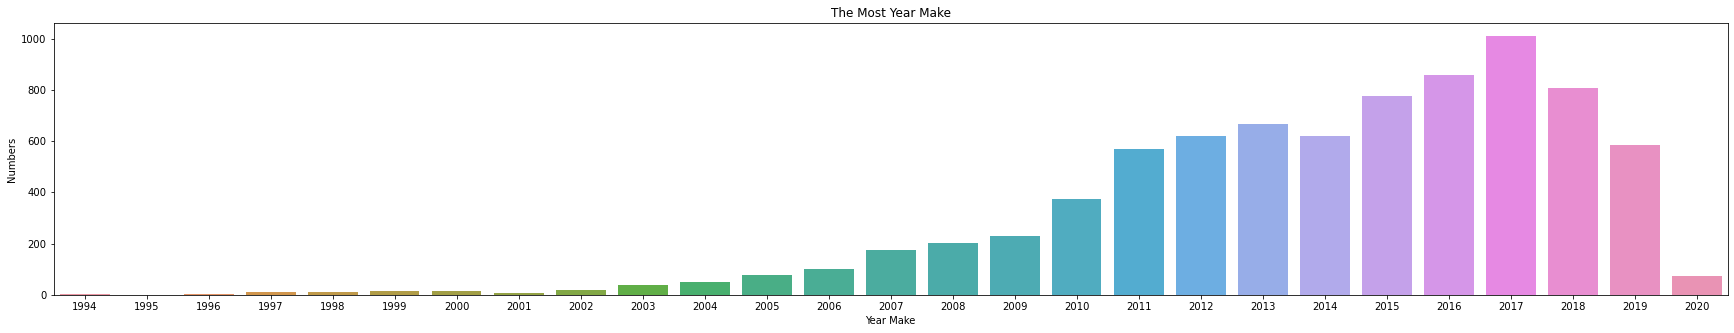

In [28]:
Yearcar=df["year"].value_counts()
print (Yearcar)
years = np.array(Yearcar)
x = list(years)
y = df.year.value_counts().index
plt.figure(figsize=(30,5))
sns.barplot(x = y,y = x)
plt.xlabel("Year Make")
plt.ylabel("Numbers")
plt.title("The Most Year Make")
plt.show()

#### Number of Sold car for each Model in the dataset

In [29]:
df1=df[df['sold']==1]
df1[['year', 'sold']].groupby(['year'], as_index=False).count().sort_values(by='sold', ascending=False)

,year,sold
19,2017,256
18,2016,225
17,2015,200
20,2018,187
15,2013,174
14,2012,159
13,2011,155
21,2019,154
16,2014,144
12,2010,96


#### Number of Not Sold car for each Model in the dataset

In [30]:
df1=df[df['sold']==0]
df1[['year', 'sold']].groupby(['year'], as_index=False).count().sort_values(by='sold', ascending=False)

,year,sold
23,2017,754
22,2016,631
24,2018,619
21,2015,575
19,2013,494
20,2014,476
18,2012,462
25,2019,429
17,2011,415
16,2010,279


#### What are the regions of used car in the dataset?

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64


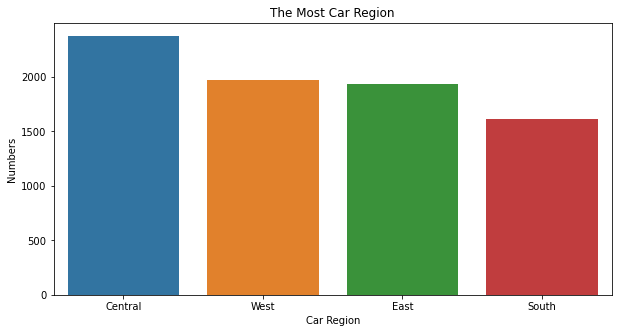

In [31]:
Regioncar=df["Region"].value_counts()
print (Regioncar)
Regions = np.array(Regioncar)
x = list(Regions)
y = df.Region.value_counts().index
plt.figure(figsize=(10,5))
sns.barplot(x = y,y = x)
plt.xlabel("Car Region")
plt.ylabel("Numbers")
plt.title("The Most Car Region")
plt.show()

#### Nummber of Sold car in each Region

In [33]:
df1=df[df['sold']==1]
df1[['Region', 'sold']].groupby(['Region'], as_index=False).count().sort_values(by='sold', ascending=False)

,Region,sold
1,East,630
0,Central,540
3,West,487
2,South,343


#### Nummber of Not Sold car in each Region

In [34]:
df1=df[df['sold']==0]
df1[['Region', 'sold']].groupby(['Region'], as_index=False).count().sort_values(by='sold', ascending=False)

,Region,sold
0,Central,1836
3,West,1489
1,East,1309
2,South,1272


#### What are the States of Cars in the dataset?

California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
New Jersey              154
Colorado                154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89
South Carolina           81
New Mexico               71
District of Columbia     68
Louisiana                66
Mississippi         

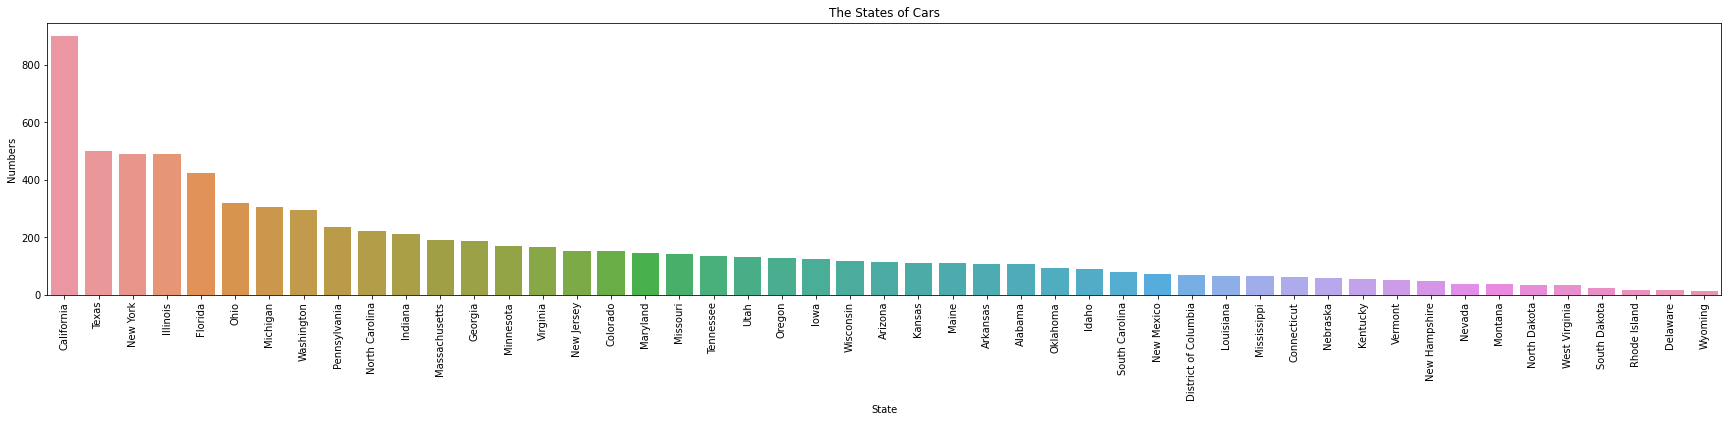

In [35]:
Regioncar=df["State or Province"].value_counts()
print (Regioncar)
Regions = np.array(Regioncar)
x = list(Regions)
y = df['State or Province'].value_counts().index
plt.figure(figsize=(30,5))
sns.barplot(x = y,y = x)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Numbers")
plt.title("The States of Cars")
plt.show()

#### What are Types of Fuel of Cars in the dataset?

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64


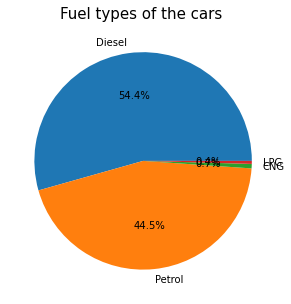

In [36]:
fueltype = df["fuel"].value_counts()
print (fueltype)
fuels = np.array(fueltype)
x = list(fuels)
y = df.fuel.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('Fuel types of the cars ',color = 'black',fontsize=15)
plt.show()

#### Number of Sold Car for each Fuel Type

In [38]:
df1=df[df['sold']==1]
df1[['fuel', 'sold']].groupby(['fuel'], as_index=False).count().sort_values(by='sold', ascending=False)

,fuel,sold
1,Diesel,1052
3,Petrol,935
0,CNG,7
2,LPG,6


#### Number of Not Sold Car for each Fuel Type

In [37]:
df1=df[df['sold']==0]
df1[['fuel', 'sold']].groupby(['fuel'], as_index=False).count().sort_values(by='sold', ascending=False)

,fuel,sold
1,Diesel,3247
3,Petrol,2585
0,CNG,45
2,LPG,29


#### What are the Seller Type in the dataset?

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64


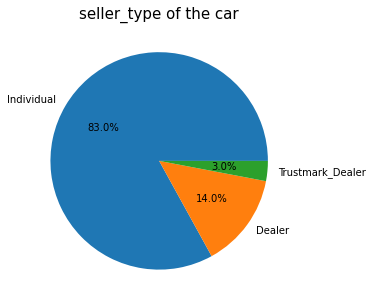

In [39]:
sellertype = df["seller_type"].value_counts()
print (sellertype)
sellers = np.array(sellertype)
x = list(sellers)
y = df.seller_type.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('seller_type of the car',color = 'black',fontsize=15)
plt.show()

#### What are Transmission Types of Cars in the datset?

Manual       6865
Automatic    1041
Name: transmission, dtype: int64


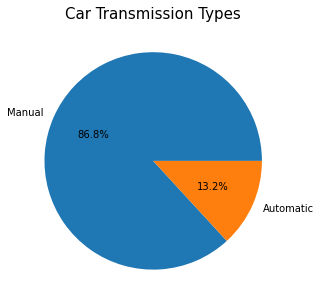

In [5]:
transmissiontype = df["transmission"].value_counts()
print (transmissiontype)
transmissions = np.array(transmissiontype)
x = list(transmissions)
y = df.transmission.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('Car Transmission Types',color = 'black',fontsize=15)
plt.show()

#### Number of Sold Car for each Transmission Type

In [7]:
df1=df[df['sold']==1]
df1[['transmission', 'sold']].groupby(['transmission'], as_index=False).count().sort_values(by='sold', ascending=False)

,transmission,sold
1,Manual,1714
0,Automatic,286


#### Number of Not Sold Car for each Transmission Type

In [8]:
df1=df[df['sold']==0]
df1[['transmission', 'sold']].groupby(['transmission'], as_index=False).count().sort_values(by='sold', ascending=False)

,transmission,sold
1,Manual,5151
0,Automatic,755


#### What are the Owner Types in the dataset?

First_Owner           5215
Second_Owner          2016
Third_Owner            510
Fourth_Above_Owner     160
Test_Drive_Car           5
Name: owner, dtype: int64


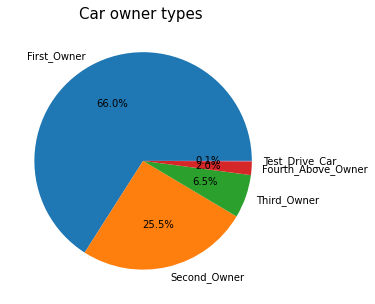

In [9]:
ownertype = df["owner"].value_counts()
print (ownertype)
owners = np.array(ownertype)
x = list(owners)
y = df.owner.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('Car owner types ',color = 'black',fontsize=15)
plt.show()

#### What are Number of Seats in the dataset?

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64


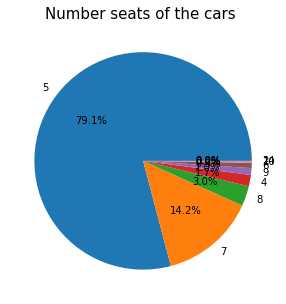

In [10]:
seatscount = df["seats"].value_counts()
print (seatscount)
seats = np.array(seatscount)
x = list(seats)
y = df.seats.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('Number seats of the cars ',color = 'black',fontsize=15)
plt.show()

#### Number of Sold Car by Seats

In [12]:
df1=df[df['sold']==1]
df1[['seats', 'sold']].groupby(['seats'], as_index=False).count().sort_values(by='sold', ascending=False)

,seats,sold
1,5,1568
3,7,287
4,8,66
0,4,34
5,9,25
2,6,18
6,10,2


#### Number of Not Sold Car by Seats

In [13]:
df1=df[df['sold']==0]
df1[['seats', 'sold']].groupby(['seats'], as_index=False).count().sort_values(by='sold', ascending=False)

,seats,sold
2,5,4686
4,7,833
5,8,169
1,4,99
6,9,55
3,6,44
7,10,17
0,2,2
8,14,1


#### Percentage of sold cars in the dataset

0    5906
1    2000
Name: sold, dtype: int64


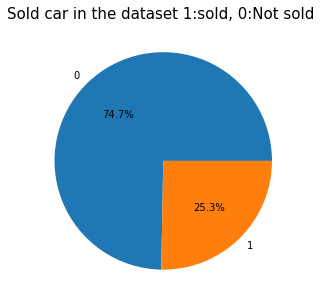

In [21]:
soldcount = df["sold"].value_counts()
print (soldcount)
solds = np.array(soldcount)
x = list(solds)
y = df.sold.value_counts().index
sizes = x
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=y,autopct="%1.1f%%")
plt.title('Sold car in the dataset 1:sold, 0:Not sold ',color = 'black',fontsize=15)
plt.show()

### Explore More Results Depend on User Entry

#### The top Number (choosen by user) of any numeric features (choosen by user)

In [18]:
print('Enter numeric feauter name:')
x = input()
print('Enter the numbers of top rows you want see. for example 10')
y=input()
y=int(y)
df.sort_values(x, ascending=False).head(y)

Enter numeric feauter name:
selling_price
Enter the numbers of top rows you want see. for example 10
8


,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
164,171,Volvo,2017,10000000,30000,East,New York,New York City,Petrol,Individual,Automatic,First_Owner,42,1969,400,4,1
2846,2939,BMW,2020,7200000,5000,South,Florida,Palm Beach Gardens,Diesel,Individual,Automatic,First_Owner,13,2993,265,7,0
4813,4953,Audi,2019,6523000,23600,Central,Missouri,Saint Peters,Petrol,Dealer,Automatic,Test_Drive_Car,15,1798,187,5,0
4811,4951,Audi,2019,6223000,7800,Central,Missouri,Saint Peters,Petrol,Dealer,Automatic,Test_Drive_Car,15,1798,187,5,0
1040,1072,BMW,2018,6000000,28156,Central,Iowa,Ankeny,Diesel,Dealer,Automatic,First_Owner,17,2993,261,4,1
4630,4767,BMW,2018,6000000,27000,South,Florida,North Port,Diesel,Dealer,Automatic,First_Owner,17,2993,261,4,0
5114,5259,Mercedes,2017,6000000,37000,South,Louisiana,Baton Rouge,Diesel,Dealer,Automatic,First_Owner,13,2987,254,5,0
131,137,Mercedes,2017,6000000,37000,West,California,Los Angeles,Diesel,Dealer,Automatic,First_Owner,13,2987,254,5,1


#### The least Number (choosen by user) of any numeric features (choosen by user)

In [33]:
print('Enter numeric feauter name:')
x = input()
print('Enter the numbers of least rows you want see. for example 10')
y=input()
y=int(y)
df.sort_values(x, ascending=True).head(y)

Enter numeric feauter name:
year
Enter the numbers of least rows you want see. for example 10
4


,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
4577,4713,Ambassador,1994,99000,100000,South,Georgia,Peachtree City,Diesel,Individual,Manual,Second_Owner,12.8,1995,52.0,106Nm@ 2200rpm,5,N
1428,1475,Maruti,1994,45000,60000,East,Massachusetts,Braintree,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
3773,3891,Maruti,1995,55000,70000,Central,Minnesota,Eden Prairie,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,N
6741,6934,Maruti,1996,42000,70000,South,South Carolina,Florence,Petrol,Individual,Manual,Third_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,N


#### Number of Sold by features (choosen by user)

In [37]:
print('Enter the feauter name to show the numbers of its sold:')
x = input()
df1=df[df['sold']==1]
df1[[x, 'sold']].groupby([x], as_index=False).count().sort_values(by='sold', ascending=False)

Enter the feauter name to show the numbers of its sold:
owner


,owner,sold
0,First_Owner,1326
2,Second_Owner,490
3,Third_Owner,135
1,Fourth_Above_Owner,49


#### Number of Not Sold by features (choosen by user)

In [38]:
print('Enter the feauter name to show the numbers of its not_sold:')
x = input()
df1=df[df['sold']==0]
df1[[x, 'sold']].groupby([x], as_index=False).count().sort_values(by='sold', ascending=False)

Enter the feauter name to show the numbers of its not_sold:
owner


,owner,sold
0,First_Owner,3889
2,Second_Owner,1526
4,Third_Owner,375
1,Fourth_Above_Owner,111
3,Test_Drive_Car,5


### 2. Target and Impact factors

#### Relationship between target and other variables

Text(0.5, 1.0, 'sold vs selling_price')

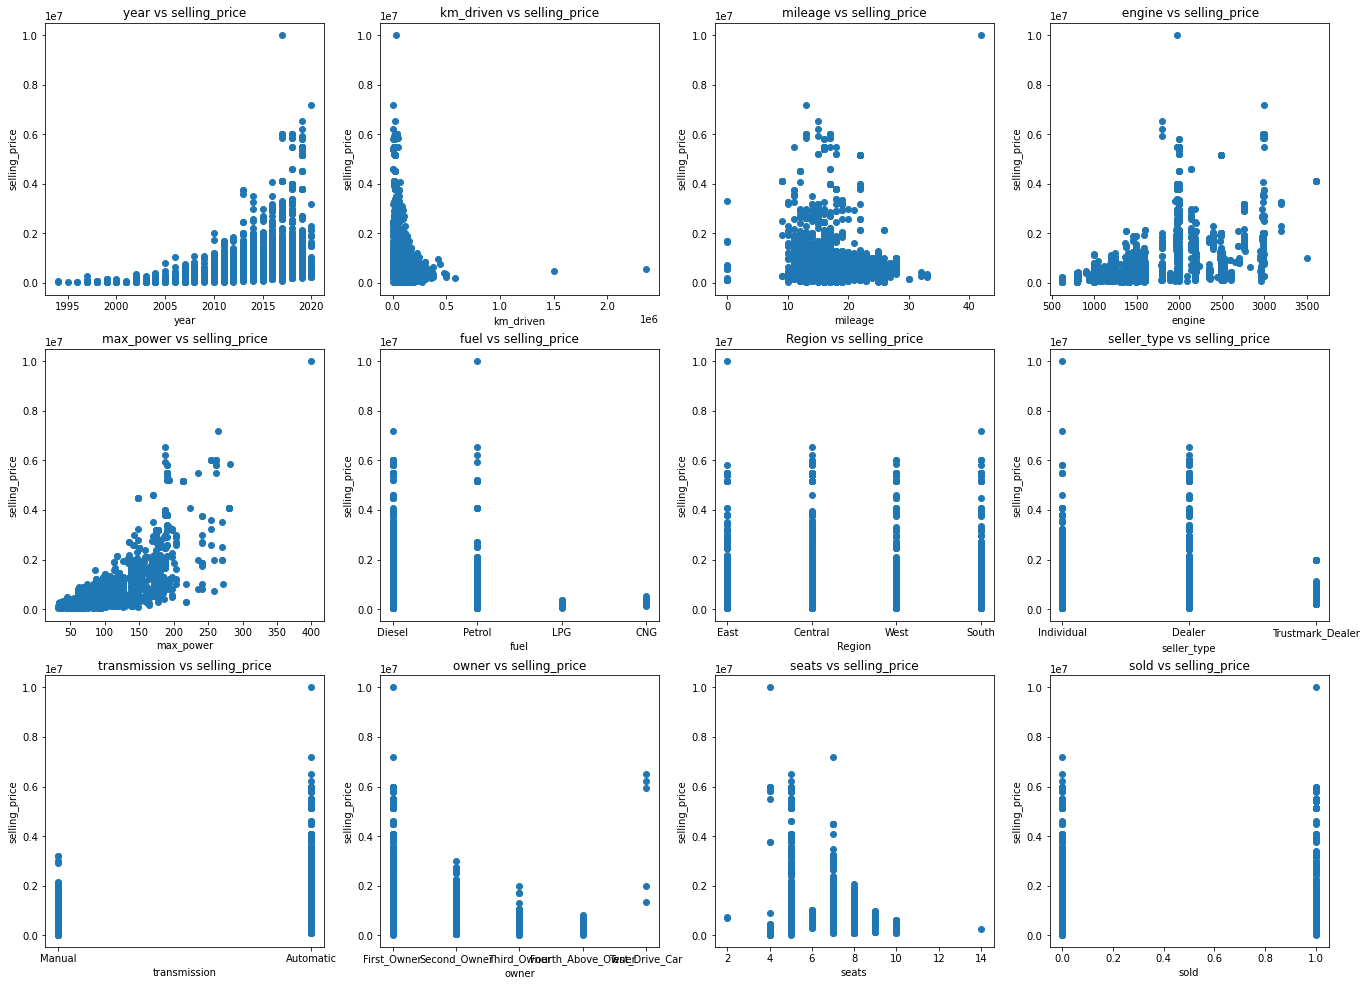

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(23,23))

x = df['selling_price']
plt.subplot(4,4,1)
plt.scatter(df['year'],x)
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('year vs selling_price')

plt.subplot(4,4,2)
plt.scatter(df['km_driven'],x)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('km_driven vs selling_price')

plt.subplot(4,4,3)
plt.scatter(df['mileage'],x)
plt.xlabel('mileage')
plt.ylabel('selling_price')
plt.title('mileage vs selling_price')

plt.subplot(4,4,4)
plt.scatter(df['engine'],x)
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.title(' engine vs selling_price')

plt.subplot(4,4,5)
plt.scatter(df['max_power'],x)
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.title('max_power vs selling_price')

plt.subplot(4,4,6)
plt.scatter(df['fuel'],x)
plt.xlabel('fuel')
plt.ylabel('selling_price')
plt.title('fuel vs selling_price')

plt.subplot(4,4,7)
plt.scatter(df['Region'],x)
plt.xlabel('Region')
plt.ylabel('selling_price')
plt.title('Region vs selling_price')

plt.subplot(4,4,8)
plt.scatter(df['seller_type'],x)
plt.xlabel('seller_type')
plt.ylabel('selling_price')
plt.title('seller_type vs selling_price')

plt.subplot(4,4,9)
plt.scatter(df['transmission'],x)
plt.xlabel('transmission')
plt.ylabel('selling_price')
plt.title('transmission vs selling_price')

plt.subplot(4,4,10)
plt.scatter(df['owner'],x)
plt.xlabel('owner')
plt.ylabel('selling_price')
plt.title('owner vs selling_price')


plt.subplot(4,4,11)
plt.scatter(df['seats'],x)
plt.xlabel('seats')
plt.ylabel('selling_price')
plt.title('seats vs selling_price')

plt.subplot(4,4,12)
plt.scatter(df['sold'],x)
plt.xlabel('sold')
plt.ylabel('selling_price')
plt.title('sold vs selling_price')

#### Transfer some factors to find new relation with target

In [352]:
df.loc[df['name'] == 'Maruti', 'name'] = 1
df.loc[df['name'] == 'Hyundai', 'name'] = 2
df.loc[df['name'] == 'Mahindra', 'name'] = 3 
df.loc[df['name'] == 'Tata', 'name'] = 4
df.loc[df['name'] == 'Honda', 'name'] = 5
df.loc[df['name'] == 'Toyota', 'name'] = 6
df.loc[df['name'] == 'Ford', 'name'] = 7
df.loc[df['name'] == 'Chevrolet', 'name'] = 8
df.loc[df['name'] == 'Renault', 'name'] = 9
df.loc[df['name'] == 'BMW', 'name'] = 10
df.loc[df['name'] == 'Volkswagen', 'name'] = 11
df.loc[df['name'] == 'Skoda', 'name'] = 12
df.loc[df['name'] == 'Nissan', 'name'] = 13
df.loc[df['name'] == 'Jaguar', 'name'] = 14
df.loc[df['name'] == 'Volvo', 'name'] = 15
df.loc[df['name'] == 'Datsun', 'name'] = 16
df.loc[df['name'] == 'Mercedes', 'name'] = 17
df.loc[df['name'] == 'Fiat', 'name'] = 18
df.loc[df['name'] == 'Audi', 'name'] = 19
df.loc[df['name'] == 'Lexus', 'name'] = 20
df.loc[df['name'] == 'Jeep', 'name'] = 21
df.loc[df['name'] == 'Mitsubishi', 'name'] = 22
df.loc[df['name'] == 'Force', 'name'] = 23
df.loc[df['name'] == 'Land', 'name'] = 24
df.loc[df['name'] == 'Isuzu', 'name'] = 25
df.loc[df['name'] == 'Kia', 'name'] = 26
df.loc[df['name'] == 'Ambassador', 'name'] = 27
df.loc[df['name'] == 'Daewoo', 'name'] = 28
df.loc[df['name'] == 'MG', 'name'] = 29
df.loc[df['name'] == 'Ashok', 'name'] = 30
df.loc[df['name'] == 'Opel', 'name'] = 31

df.loc[df['Region'] == 'East', 'Region'] = 1
df.loc[df['Region'] == 'Central', 'Region'] = 2
df.loc[df['Region'] == 'West', 'Region'] = 3
df.loc[df['Region'] == 'South', 'Region'] = 4

df.loc[df['fuel'] == 'CNG', 'fuel'] = 1 
df.loc[df['fuel'] == 'Petrol', 'fuel'] = 2
df.loc[df['fuel'] == 'Diesel', 'fuel'] = 3
df.loc[df['fuel'] == 'LPG', 'fuel'] = 4

df.loc[df['seller_type'] == 'Individual', 'seller_type'] = 1
df.loc[df['seller_type'] == 'Dealer', 'seller_type'] = 2
df.loc[df['seller_type'] == 'Trustmark_Dealer', 'seller_type'] = 3

df.loc[df['transmission'] == 'Automatic', 'transmission'] = 1
df.loc[df['transmission'] == 'Manual', 'transmission'] = 2

df.loc[df['owner'] == 'First_Owner', 'owner'] = 1
df.loc[df['owner'] == 'Second_Owner', 'owner'] = 2
df.loc[df['owner'] == 'Third_Owner', 'owner'] = 3
df.loc[df['owner'] == 'Fourth_Above_Owner', 'owner'] = 4
df.loc[df['owner'] == 'Test_Drive_Car', 'owner'] = 5

#Transfer to integer
df['name']=df['name'].astype(int)
df['Region']=df['Region'].astype(int)
df['fuel']=df['fuel'].astype(int)
df['transmission']=df['transmission'].astype(int)
df['seller_type']=df['seller_type'].astype(int)
df['owner']=df['owner'].astype(int)


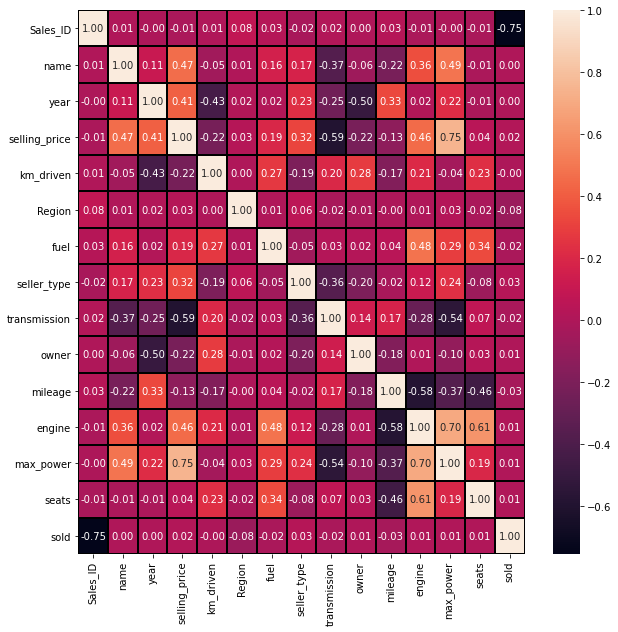

In [29]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="black",fmt=".2f",ax=ax)
plt.show()

#### What are the most brand have high price?

<AxesSubplot:title={'center':'brand and selling price'}, xlabel='name', ylabel='Selling price(x1000000)'>

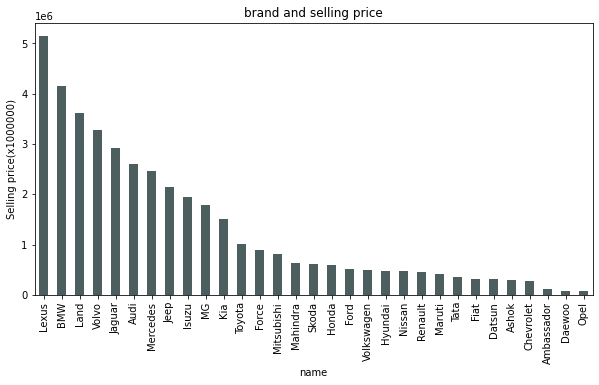

In [16]:
plt.figure(figsize=(10,5))
name=df.groupby('name')['selling_price'].mean().sort_values(ascending = False)
plt.title('brand and selling price')
plt.ylabel('Selling price(x1000000)')
name.plot(kind='bar',color=(0.0, 0.1, 0.1, 0.7))

#### What is the most region with high car price?

<AxesSubplot:title={'center':'Region and selling price'}, xlabel='Region', ylabel='Selling price'>

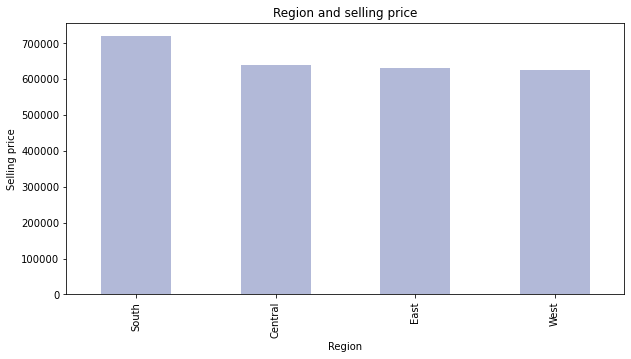

In [4]:
plt.figure(figsize=(10,5))
region=df.groupby('Region')['selling_price'].mean().sort_values(ascending = False)
plt.title('Region and selling price')
plt.ylabel('Selling price')
region.plot(kind='bar',color=(0.0, 0.1, 0.5, 0.3))

## Model Revision

### Linear Regression

In [282]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
x = df[['name','Region','seller_type','fuel','transmission','owner','year','km_driven','mileage','engine','max_power','seats']]
y = df['selling_price']
regr = linear_model.LinearRegression()
regr.fit(x, y)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1386.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:52   Log-Likelihood:            -1.1433e+05
No. Observations:                7906   AIC:                         2.287e+05
Df Residuals:                    7893   BIC:                         2.288e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.893e+07   3.85e+06    -17.914   

r2 score for perfect model is 0.6779905001660709
 


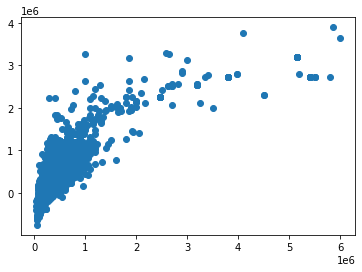

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions1 = lm.predict(X_test)
r2 = r2_score(y_test, predictions1)
print('r2 score for perfect model is', r2)
print(' ')
plt.scatter(y_test, predictions1)

### Decision Tree Regression

#### 1. Applay all Features to Model

In [353]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
x = df[['name','Region','seller_type','fuel','transmission','owner','year','km_driven','mileage','engine','max_power','seats']]
y = df['selling_price']
regressor.fit(x, y)
r_squared = regressor.score(x, y)
r_squared

0.9997938533984421

r2 score for perfect model is 0.9444390842215931
 


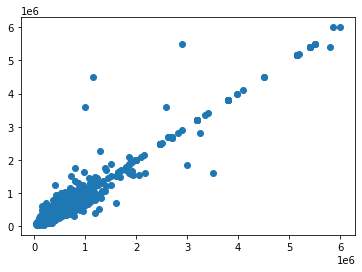

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = DecisionTreeRegressor()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)
print('r2 score for perfect model is', r2)
print(' ')
plt.scatter(y_test, predictions)

#### Actual values VS Predicted values

In [336]:
dfpredict=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
dfpredict

,Actual,Predicted
3927,430000,430000.0
4695,779000,779000.0
4979,200000,210000.0
6325,800000,825000.0
44,390000,545000.0
...,...,...
7596,450000,525000.0
2228,650000,525000.0
555,120000,85000.0
4916,340000,330000.0


#### 2.Apply Some Features to Model

I chose only the three most impactful features on target to test if there is performance improvement.

In [355]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
x = df[['year','engine','max_power']]
y = df['selling_price']
regressor.fit(x, y)
r_squared = regressor.score(x, y)
r_squared

0.9887830820330716

r2 score for perfect model is 0.9678803603312136
 


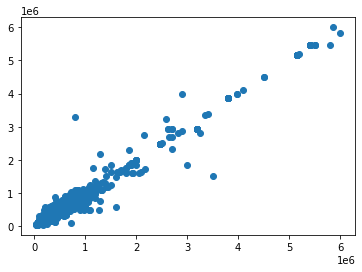

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = DecisionTreeRegressor()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)
print('r2 score for perfect model is', r2)
print(' ')
plt.scatter(y_test, predictions)

#### Actual values VS Predicted values

In [339]:
dfpredict=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
dfpredict

,Actual,Predicted
3927,430000,448458.291667
4695,779000,763266.666667
4979,200000,218399.900000
6325,800000,802857.142857
44,390000,435782.478261
...,...,...
7596,450000,495900.000000
2228,650000,613529.411765
555,120000,85000.000000
4916,340000,345000.000000


## Final Analysis

I found the most impact factors in the target (price) as a positive impact are max-power, engine, and year. km-driven factor affects the price negatively. Also from data analysis and visualization, the price increases with automatic transmission more than with manual. Price increases if the owner of the car is the first owner or if the vehicle is test-driven car. Petrol and Diesel fuel increase the price more than other fuels.

In the model part, I used R2 to evaluate models. first I used the Linear Regression model to predict the price of the car. I got R2= 0.678 which is the performance measure of the model. When R2 is close to 1 means better and there is variance between features and target. I tried to improve the R2, so I used the Decision Tree Regression model. The R2= 0.95 which means better than the Linear Regression model. All this work done with help of Python (Panda, Numby, Matplotlib and sklearn).

To avoid overfitting, I decided to use reduce and remove outliers to check if there is an improvement. First, I started by reducing the features where I reduced the features from 12 features to 3. These three features are selected based on which correlation matrix shows which feature has the greatest effect on the target. After applying the model for the reducing version, the performance was improved (from 0.94 to 0.96). Then I tested the model by letting the user select the vehicle's features. I ran the test several times with different values and saw that the model predicted exactly the average price or close to it (in the range).

Second, I removed the outliers that dropped over 500 rows of data. Then I checked the performance of the model for 12 features and 3 features (reducing version) after removing the outliers. I got 0.77 and 0.88 respectively.
Therefore, I see that the three features (reduce version) are sufficient to get good model performance, and don't need to remove outliers.

Finally, the research question is:
What is the price of a car with these features (year = 2016, engine = 1248, maximum power = 88)? predicted is done. The answer is 738,114, depending on the data set. I confirmed the result by analyzing the Excel file (dataset) and found that the result is equal to the average price of the above provided features.

### Find Car Price by User

The user needs to enter 3 features of his car (Year, Engine and Max Power) then the user will get the estimated price.

In [382]:
import pandas as pd
new1 = pd.DataFrame(columns=['year','engine','max_power','selling_price'])

In [366]:
lm.fit(x, y)
print('Enter year:')
a1 = input()
new1['year']=[a1]
print('Enter engin:')
a2 = input()
new1['engine']=[a2]
print('Enter max-power:')
a3 = input()
new1['max_power']=[a3]
s1 = new1[['year','engine','max_power']]
predictionss = lm.predict(s1)
new1['selling_price']=predictionss
print('Predicted',predictionss)

Enter year:
2016
Enter engin:
1248
Enter max-power:
88
Predicted [738114.73770492]
